# Plotting Census Data for Albany City with cenpy-api

## State: California
## County: Alameda County
## Zip codes: 94706, 94707, 94710, 94804

In [2]:
pip install cenpy==1.0.1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 52.7 MB/s eta 0:00:00
  Created wheel for cenpy: filename=cenpy-1.0.1-py3-none-any.whl size=30042 sha256=c31f64222c029caf554c1616af01a6e19d82c1269d839d8b3b0d14bcdf4edf92
  Stored in directory: /root/.cache/pip/wheels/07/30/af/fb4d49767fab2c1dc05bd0ae22816469f929156f091b4eba58
Successfully built cenpy


In [3]:
import cenpy
print(cenpy.__version__)

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


1.0.1


In [4]:
import cenpy
from cenpy import products
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os

In [20]:
# additional libraries from subway system analysis example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import itertools
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import zipfile
import io
import requests
! pip install geopandas==0.8.2
import geopandas as gpd
from shapely.geometry import shape
import shapefile
! pip install pyshp
!pip install mapclassify

# Variables of Interest
## Total Population: B01001_001E
## Median household income: B19013_001E

In [6]:
## Extract from Alameda County
alameda_county = products.ACS(2019).from_county('Alameda',level='tract',
                                        variables=['B01001_001E','B19013_001E'])
alameda_county.head()

/usr/local/lib/python3.10/dist-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,B01001_001E,B19013_001E,NAME,state,county,tract
0,06001443321,"POLYGON ((-13573121.840 4507617.670, -13573118...",3368.0,130875.0,"Census Tract 4433.21, Alameda County, California",06,001,443321
1,06001425104,"POLYGON ((-13613398.680 4556103.530, -13613358...",3539.0,72315.0,"Census Tract 4251.04, Alameda County, California",06,001,425104
2,06001421800,"POLYGON ((-13612511.680 4562618.280, -13612503...",2144.0,140688.0,"Census Tract 4218, Alameda County, California",06,001,421800
3,06001422300,"POLYGON ((-13612458.250 4562016.630, -13612437...",3643.0,79555.0,"Census Tract 4223, Alameda County, California",06,001,422300
4,06001421200,"POLYGON ((-13612816.590 4565165.880, -13612811...",3594.0,166071.0,"Census Tract 4212, Alameda County, California",06,001,421200


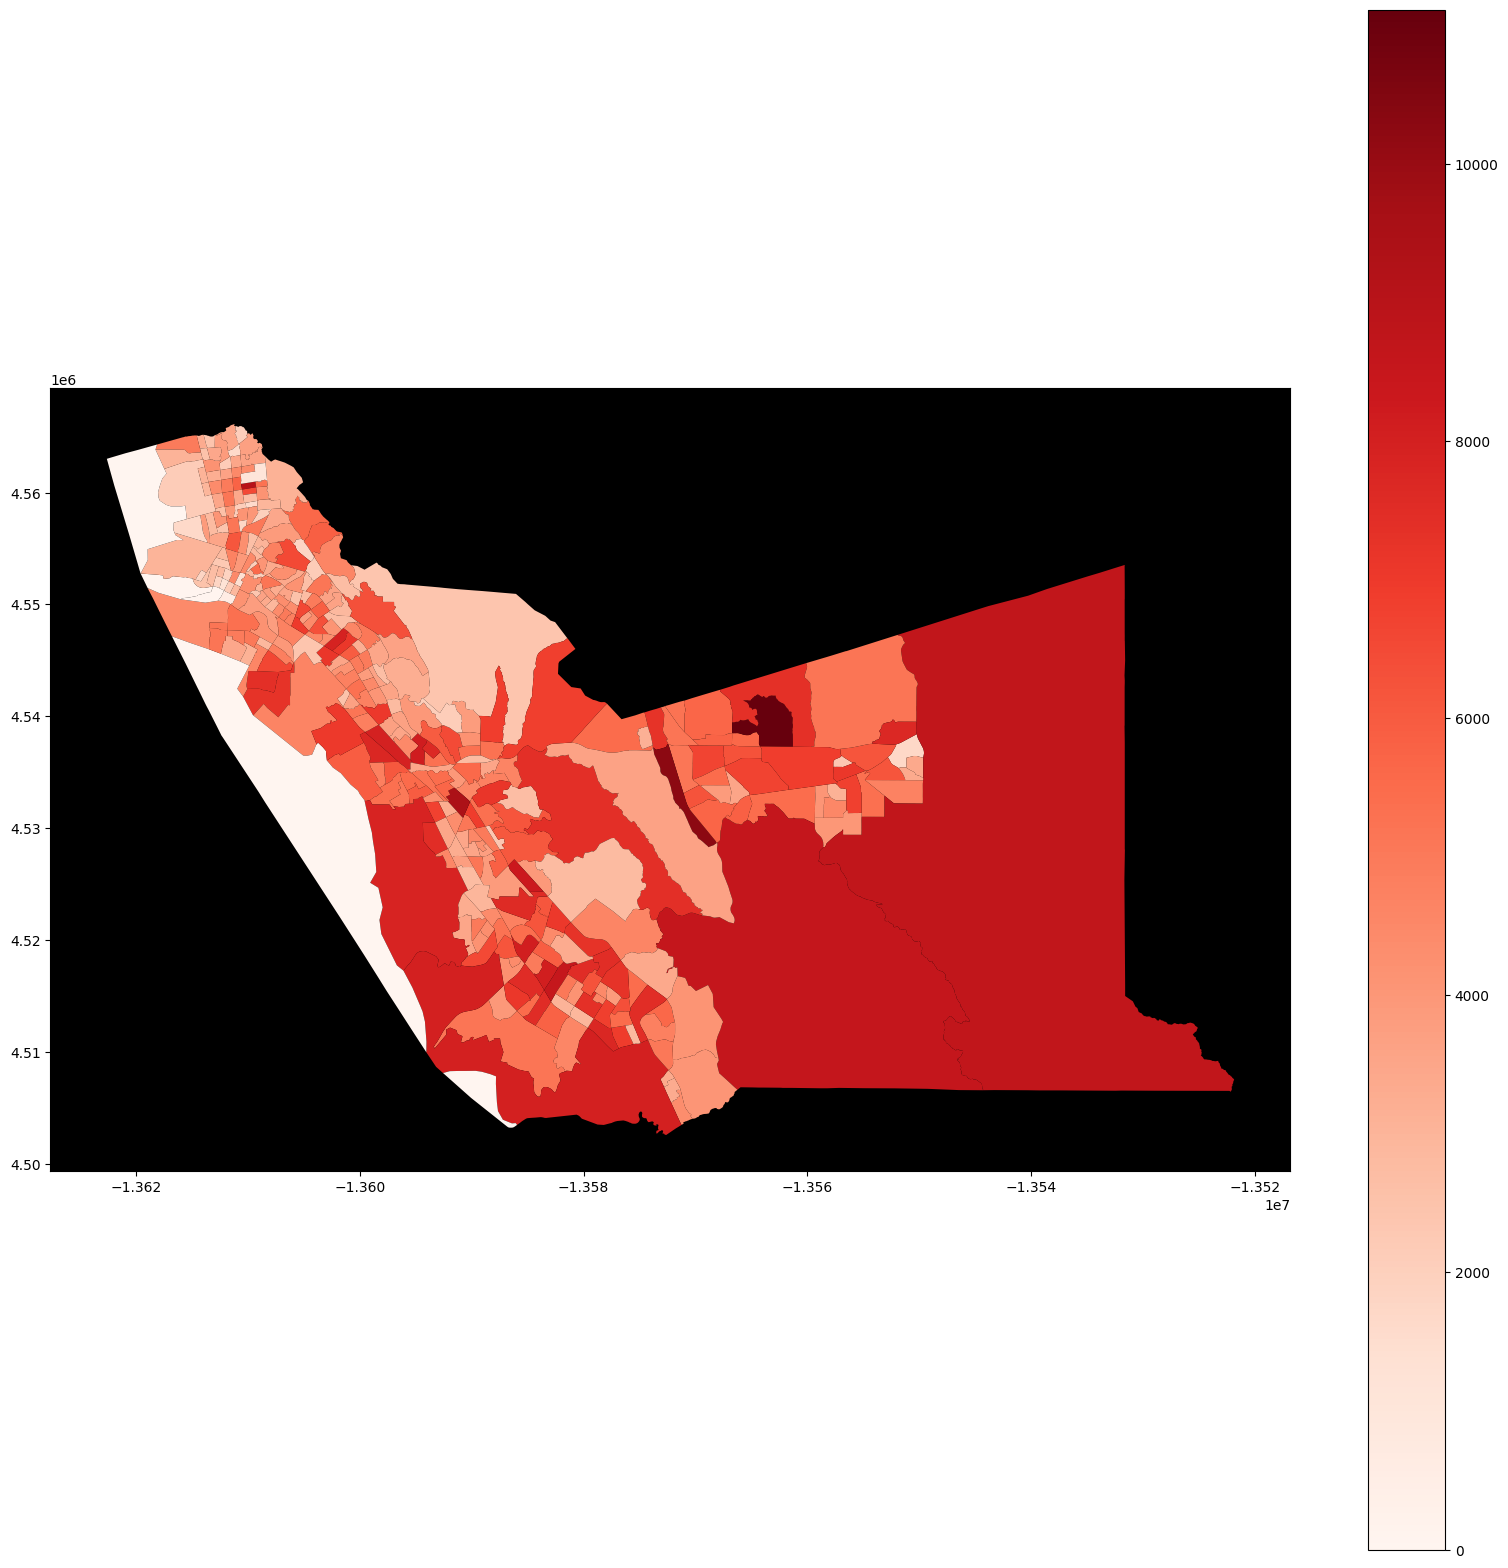

In [7]:
#Plot Total Population
f, ax = plt.subplots(1,1,figsize=(20,20))
alameda_county.dropna(subset=['B01001_001E'], axis=0).plot('B01001_001E', ax=ax, cmap='Reds',legend=True)
ax.set_facecolor('k')

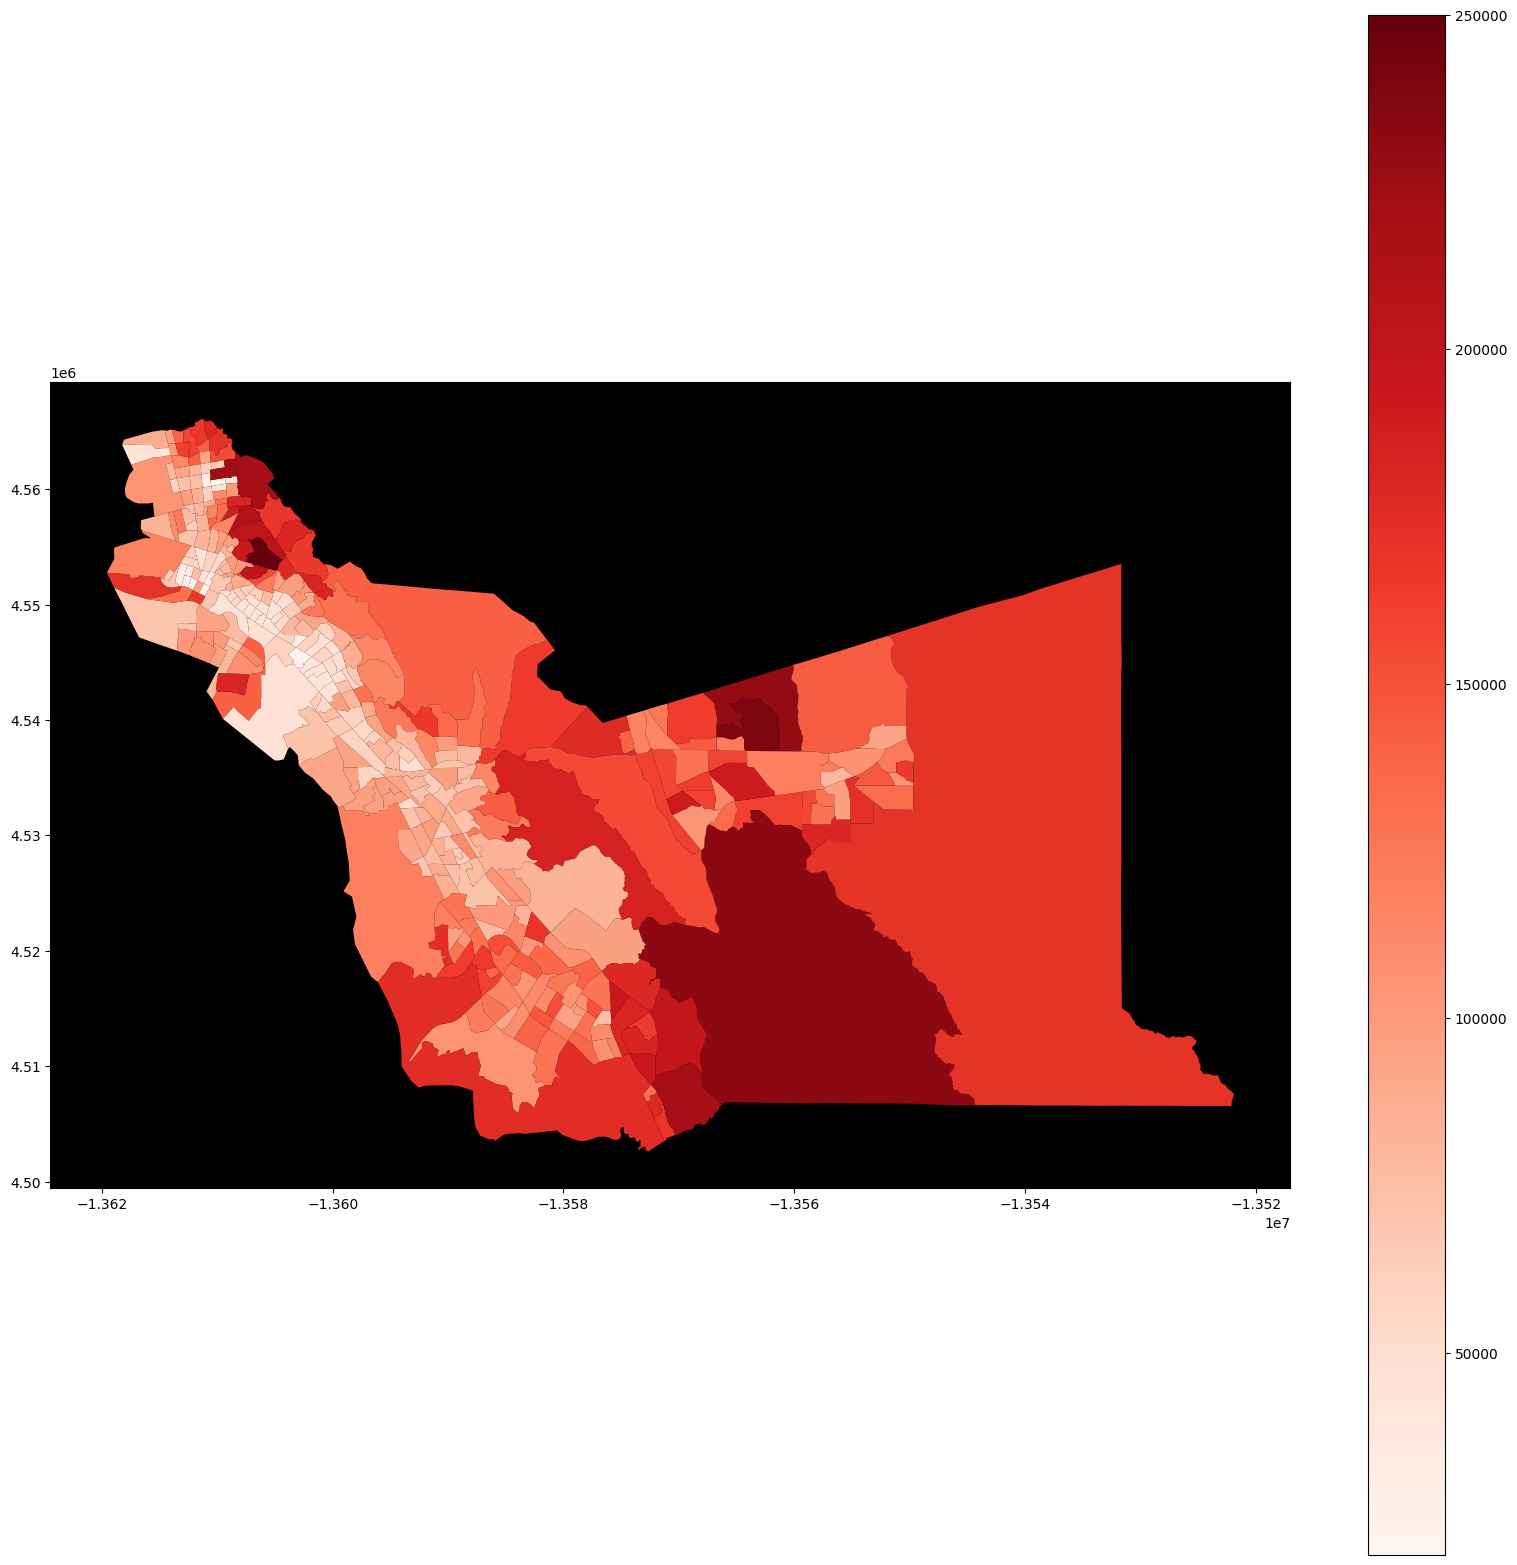

In [8]:
#Plot Median Income
f, ax = plt.subplots(1,1,figsize=(20,20))
alameda_county.dropna(subset=['B19013_001E'], axis=0).plot('B19013_001E', ax=ax, cmap='Reds',legend=True)
ax.set_facecolor('k')

In [9]:
# specify the file path to write/read to
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Convert Pandas DataFrame to GeoDataFrame
alameda_county_geo = gpd.GeoDataFrame(alameda_county, geometry=alameda_county['geometry'])

# file path for extraction of Alameda County Census data
file_path = os.path.join('/content/drive/My Drive/CE263H Network Science/CE263H Network Science Project/Census_Data/alameda_county', 'alameda_county_census.shp')

# Save GeoDataFrame to shapefile
output_shapefile_path = 'alameda_county_census.shp' #setting the filename
alameda_county_geo.to_file(output_shapefile_path, driver='ESRI Shapefile')
alameda_county_geo.to_file(file_path)

<ipython-input-10-e0f80d252d8c>:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  alameda_county_geo.to_file(output_shapefile_path, driver='ESRI Shapefile')
<ipython-input-10-e0f80d252d8c>:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  alameda_county_geo.to_file(file_path)


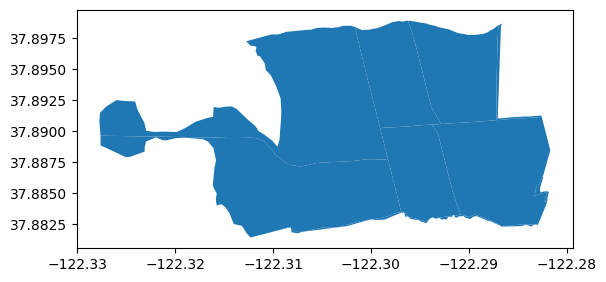

In [11]:
# Plot extracted Albany Census Data

shapefile_path = '/content/drive/My Drive/CE263H Network Science/CE263H Network Science Project/Census_Data/Albany_Census/Albany_Census.shp'

albany = gpd.read_file(shapefile_path)

# Plot the shapefile
albany.plot()
plt.show()

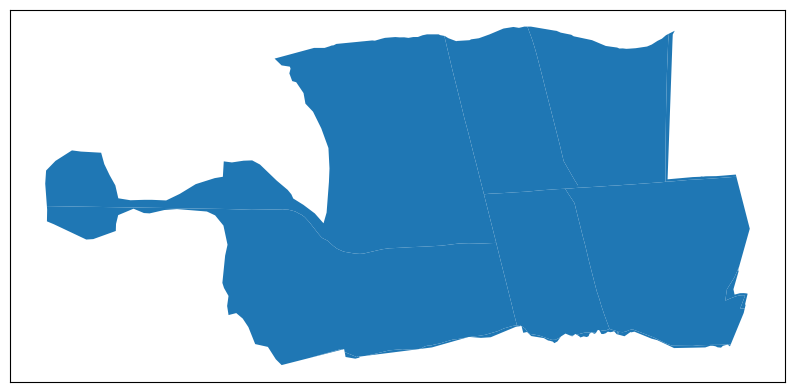

In [12]:
# Plot shapefile of Albany
ax = albany.plot(figsize=(10,10),linewidth=2)
ax.set(xticks=[], yticks=[]);

In [13]:
# Print the attribute table
print(albany)

   OBJECTID  FID_Albany  id AlbanyBdrs  FID_alamed        GEOID  B01001_001  \
0         1           0   0          1         128  06001422000      2156.0   
1         2           0   0          1         176  06001420200      3332.0   
2         3           0   0          1         177  06001420500      2557.0   
3         4           0   0          1         179  06001420100      2440.0   
4         5           0   0          1         225  06001420300      4977.0   
5         6           0   0          1         228  06001421900      4171.0   
6         7           0   0          1         229  06001421300      3873.0   
7         8           0   0          1         266  06001420400      3062.0   
8         9           0   0          1         268  06001420600      3436.0   

   B19013_001                                           NAME state county  \
0    104826.0  Census Tract 4220, Alameda County, California    06    001   
1     97195.0  Census Tract 4202, Alameda County, Calif

In [14]:
# Drop the geometry column
attribute_table = albany.drop('geometry', axis=1)

# Print the attribute table
print(attribute_table)

   OBJECTID  FID_Albany  id AlbanyBdrs  FID_alamed        GEOID  B01001_001  \
0         1           0   0          1         128  06001422000      2156.0   
1         2           0   0          1         176  06001420200      3332.0   
2         3           0   0          1         177  06001420500      2557.0   
3         4           0   0          1         179  06001420100      2440.0   
4         5           0   0          1         225  06001420300      4977.0   
5         6           0   0          1         228  06001421900      4171.0   
6         7           0   0          1         229  06001421300      3873.0   
7         8           0   0          1         266  06001420400      3062.0   
8         9           0   0          1         268  06001420600      3436.0   

   B19013_001                                           NAME state county  \
0    104826.0  Census Tract 4220, Alameda County, California    06    001   
1     97195.0  Census Tract 4202, Alameda County, Calif

<Axes: >

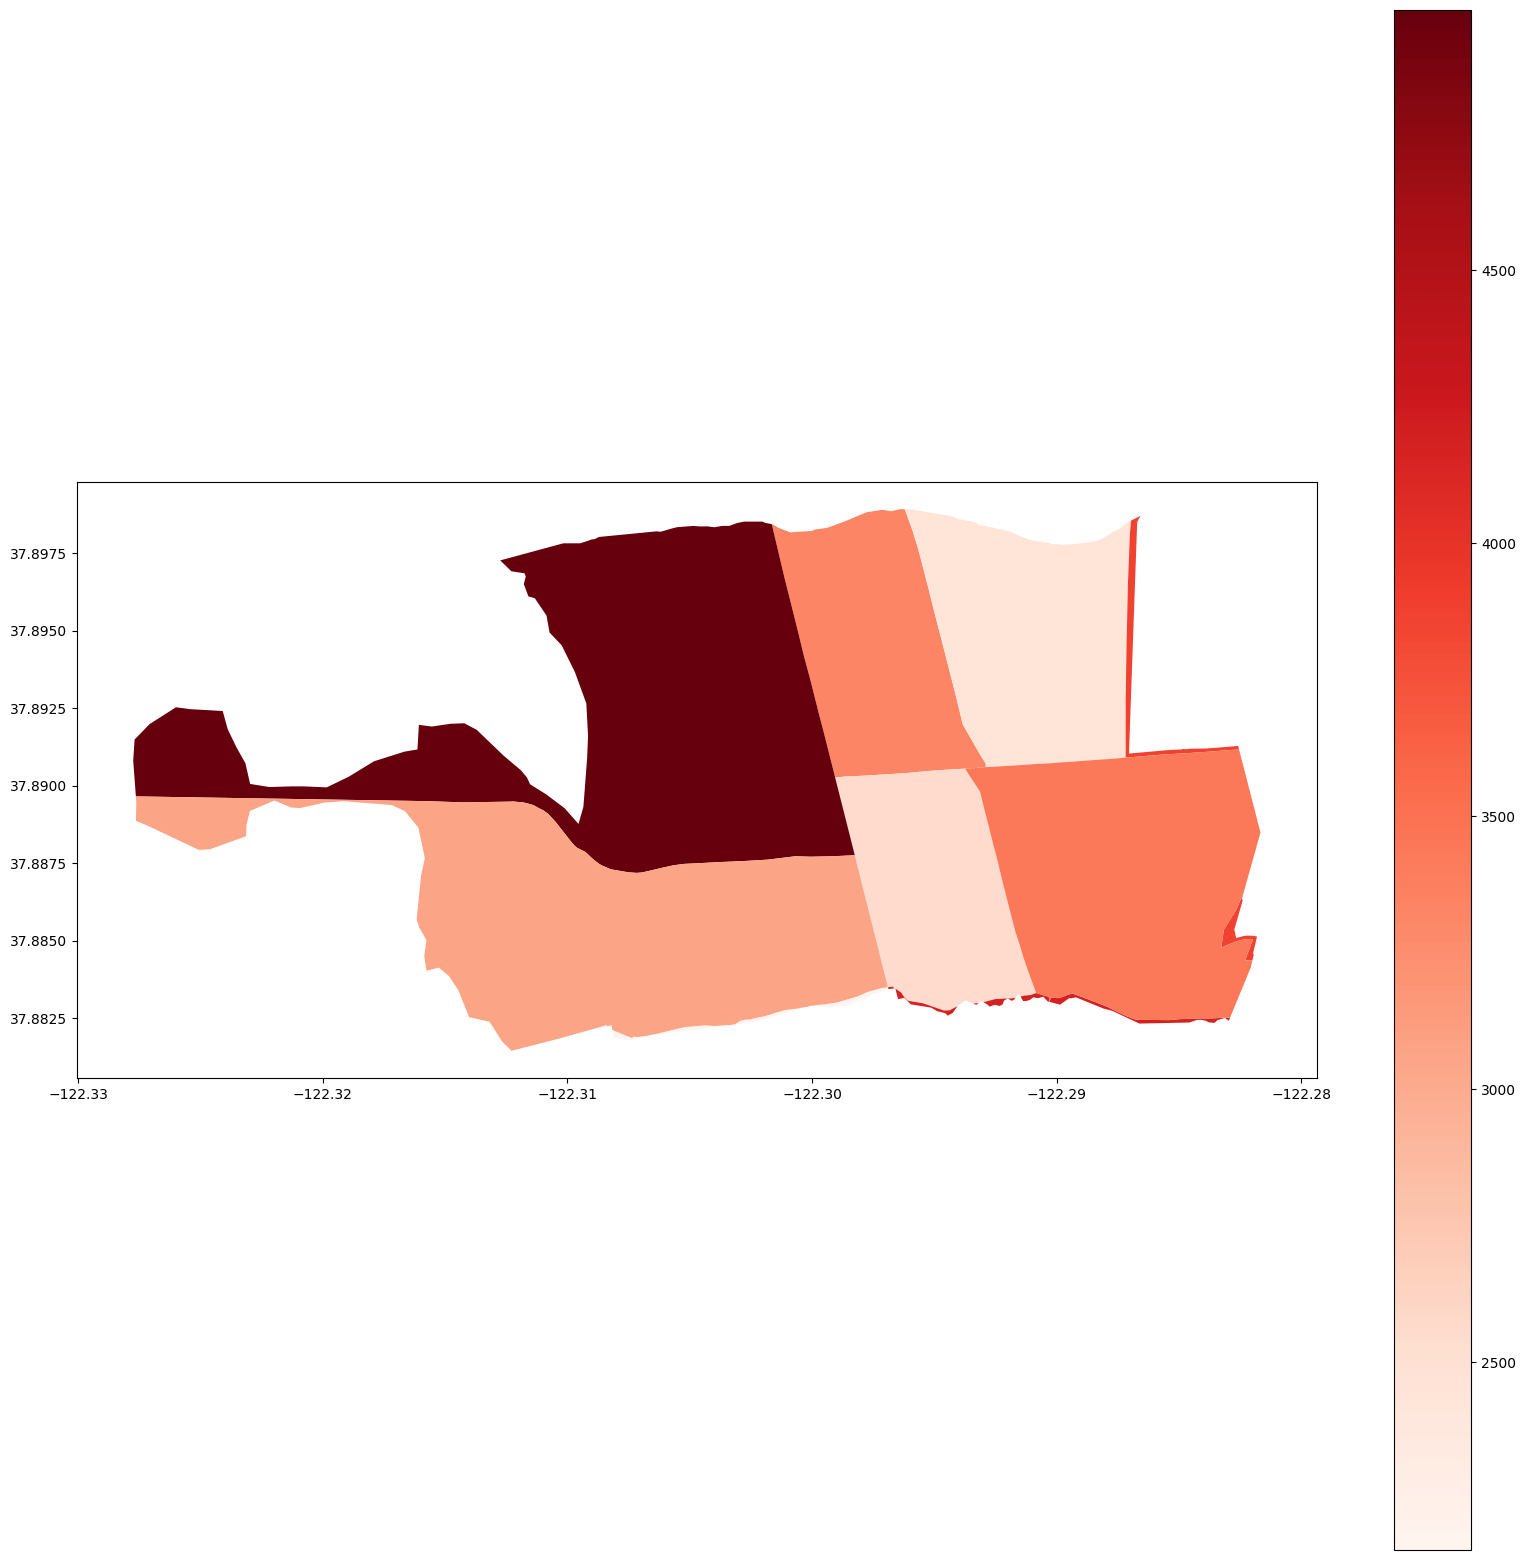

In [32]:
#Plot Total Population
f, ax = plt.subplots(1,1,figsize=(20,20))
albany.dropna(subset=['B01001_001'], axis=0).plot('B01001_001', ax=ax, cmap='Reds', legend=True)

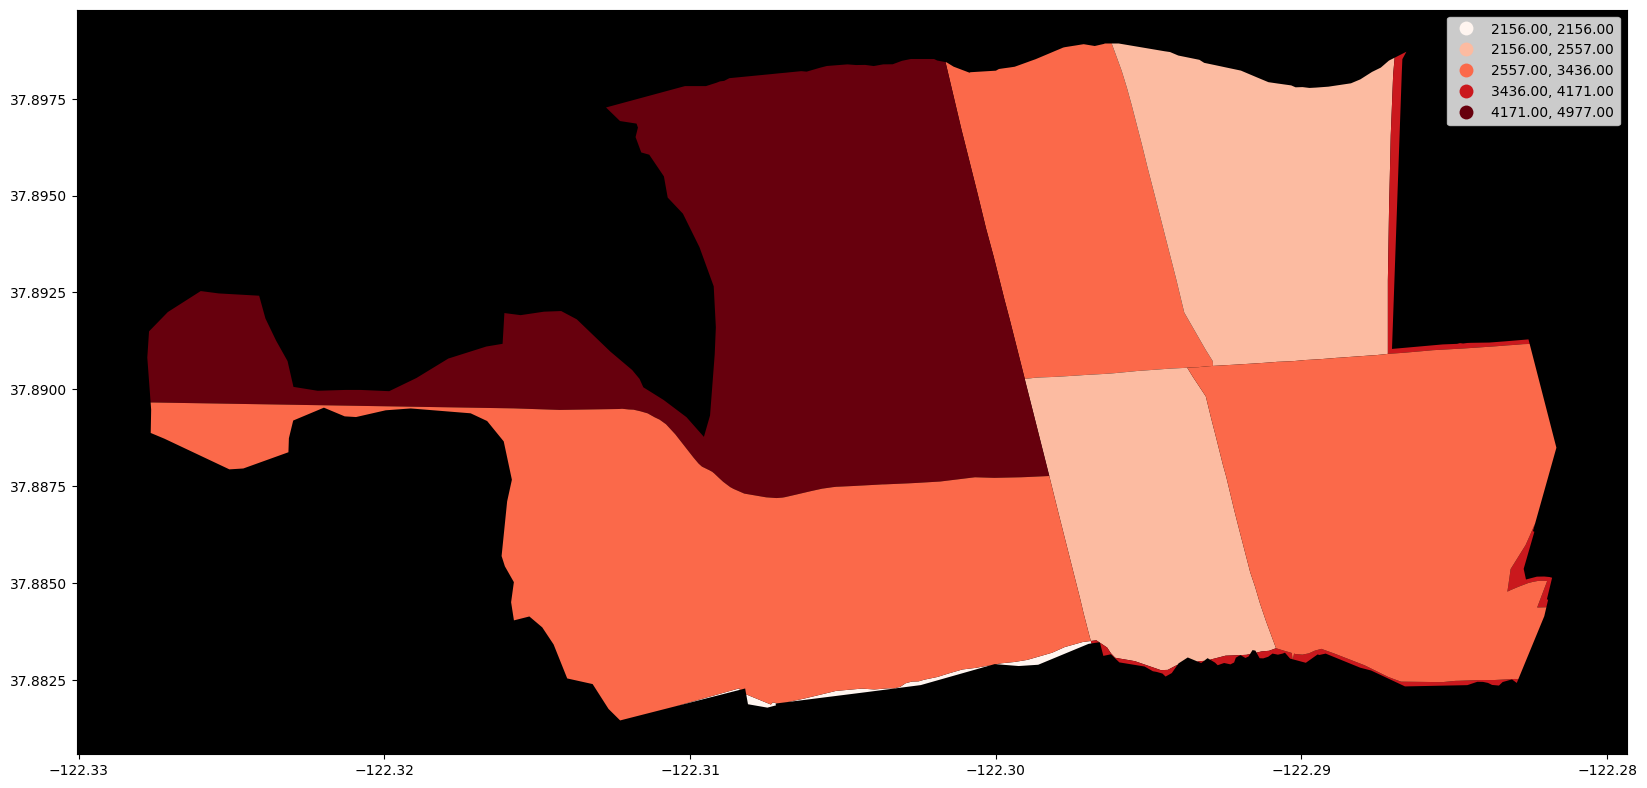

In [40]:
#Plot Total Population
f, ax = plt.subplots(1,1,figsize=(20,20))
albany.dropna(subset=['B01001_001'], axis=0).plot('B01001_001', ax=ax, cmap='Reds', scheme="fisher_jenks", legend=True)
ax.set_facecolor('k')

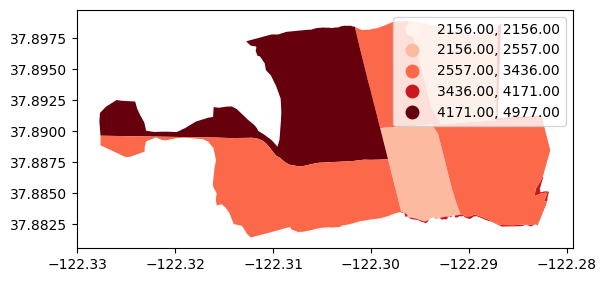

In [27]:
# Drop rows with missing values in the 'B01001_001' column
albany_pop = albany.dropna(subset=['B01001_001'], axis=0)

# Create a plot
fig, ax = plt.subplots()
albany_pop.plot('B01001_001', figsize=(10,10), linewidth=2, scheme="fisher_jenks", ax=ax, k=5, cmap='Reds', legend=True)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Plot Shapefile of Albany City with Total Population
#ax_al = albany.plot(figsize=(10,10),linewidth=2, cmap='Reds', scheme="fisher_jenks", k=5, legend=True)
#ax_al.set(xticks=[], yticks=[]);

# Show the plot
plt.show()

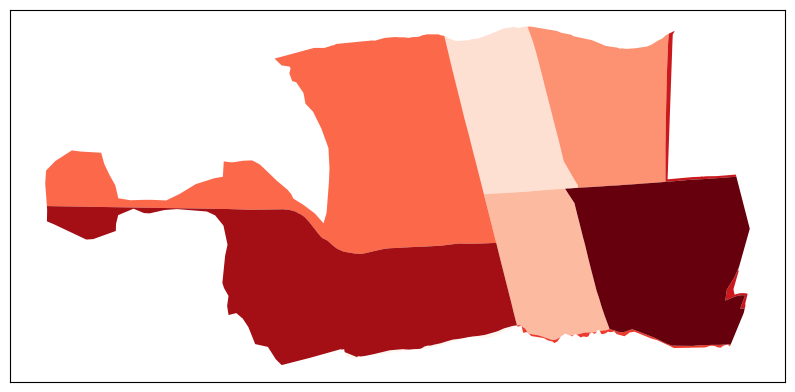

In [29]:
# Plot Shapefile of Albany City with Total Population
ax_al = albany.plot(figsize=(10,10),linewidth=2, cmap='Reds', scheme="fisher_jenks", legend=True)
ax_al.set(xticks=[], yticks=[]);

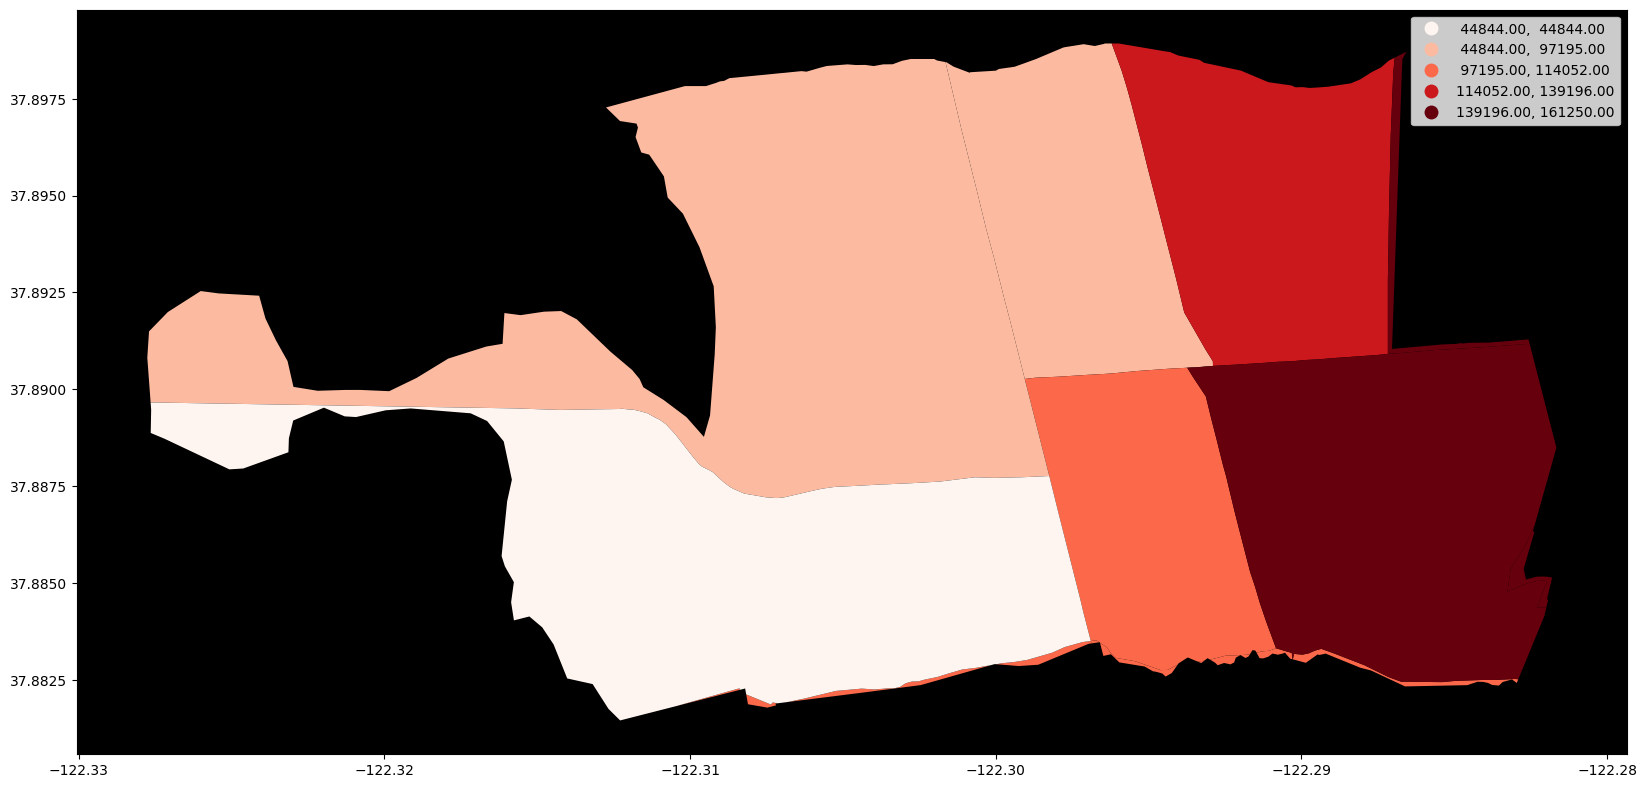

In [39]:
#Plot Albany Median Income
f, ax = plt.subplots(1,1,figsize=(20,20))
albany.dropna(subset=['B19013_001'], axis=0).plot('B19013_001', ax=ax, cmap='Reds', scheme="fisher_jenks", legend=True)
ax.set_facecolor('k')